<a href="https://colab.research.google.com/github/nadireus/Statistics-with-Python/blob/main/Statistics_(Descriptive_Stats_%26_Correlation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#**Descriptive Statistics**

[Seaborn Datasets](https://github.com/mwaskom/seaborn-data)

[Titanic dataset](https://www.kaggle.com/brendan45774/test-file)

In [4]:
# Load Titanic Dataset


In [3]:
df =sns.load_dataset("titanic")

In [6]:
fare = np.array(df["fare"])

In [7]:
stats.skew(fare)

4.7792532923723545

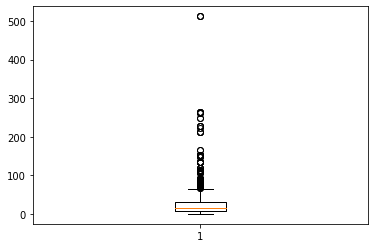

In [8]:
plt.boxplot(fare);

In [ ]:
fare<=200

In [10]:
boolarr = fare <=200

In [11]:
newfare = fare[boolarr]

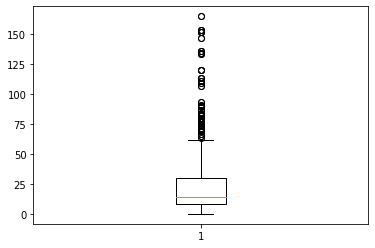

In [12]:
plt.boxplot(newfare);

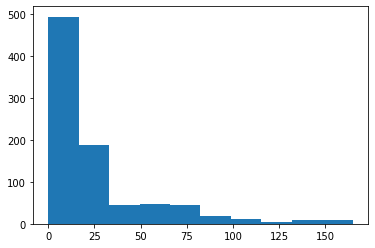

In [13]:
plt.hist(newfare);

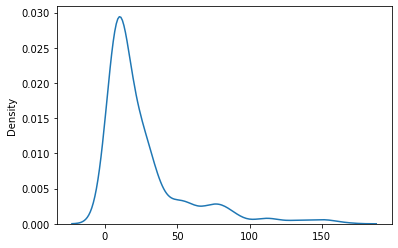

In [14]:
sns.kdeplot(newfare);

In [15]:
np.var(newfare)

860.5028943449321

In [16]:
np.std(newfare)

29.33432962153613

In [17]:
 Q1 =np.percentile(newfare, 25)#Q1 calculation

In [18]:
np.percentile(newfare, 50)

13.8625

In [19]:
np.percentile(newfare, 50) == np.median(newfare)

True

In [20]:
Q3 = np.percentile(newfare, 75)#Q3 calculation

In [21]:
iqr1 = Q3-Q1

In [22]:
stats.iqr(newfare)

22.1042

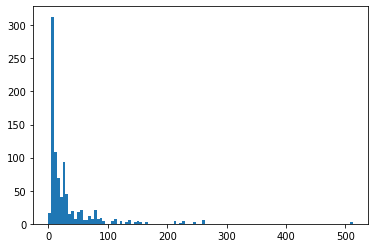

In [23]:

plt.hist(fare, bins='auto');

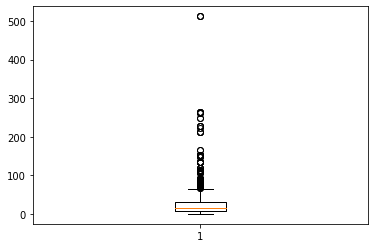

In [24]:
plt.boxplot(fare);

In [25]:
boolarr = fare < 200

In [ ]:
newfare = fare[boolarr]

In [ ]:
plt.boxplot(newfare);

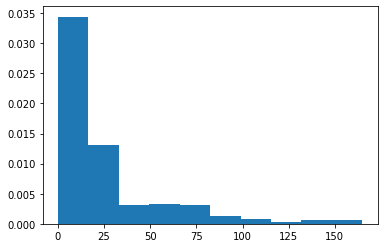

In [26]:
plt.hist(newfare, density= True);

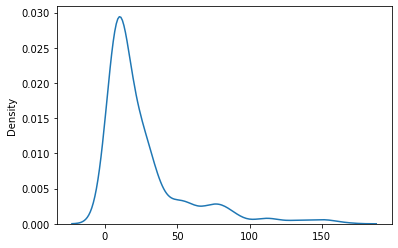

In [27]:
sns.kdeplot(newfare)

In [28]:
stats.skew(newfare)

2.2471201602453075

In [29]:
stats.mode(newfare)

ModeResult(mode=array([8.05]), count=array([43]))

In [30]:
np.var(newfare)

860.5028943449321

In [31]:
np.std(newfare)

29.33432962153613

In [32]:
np.percentile(newfare, 50)

13.8625

In [33]:
np.percentile(newfare, 50) == np.median(newfare)

True

In [34]:
np.percentile(newfare, 25)

7.8958

In [35]:
np.percentile(newfare, 75)

30.0

In [36]:
iqr = np.percentile(newfare, 75)-np.percentile(newfare, 25)
iqr

22.1042

In [37]:
stats.iqr(newfare)

22.1042

In [38]:
stats.describe(newfare)

DescribeResult(nobs=871, minmax=(0.0, 164.8667), mean=26.53017037887486, variance=861.4919781315355, skewness=2.2471201602453075, kurtosis=5.266968870155699)

# **Scatter Plot**
---

In [41]:
tv_hours = [3,5,2,0,5,3,1,4,3,4] #öğrencilerin TV izleme süreleri
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6] #not ortalaması

In [42]:
np.array(tv_hours)

array([3, 5, 2, 0, 5, 3, 1, 4, 3, 4])

In [43]:
tv_hours = np.array(tv_hours)
GPA = np.array(GPA)

In [40]:
tv_hours*3

array([ 9, 15,  6,  0, 15,  9,  3, 12,  9, 12])

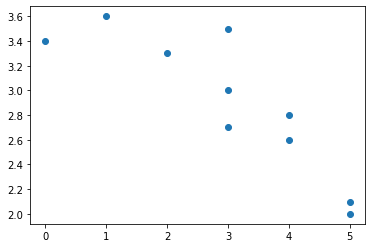

In [44]:
plt.scatter(tv_hours, GPA);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


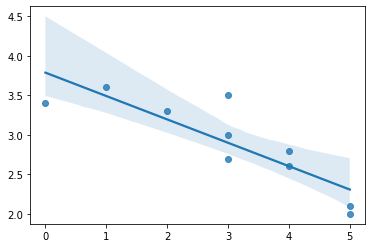

In [45]:
sns.regplot(tv_hours, GPA);

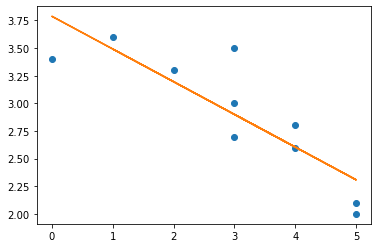

In [46]:

m,b = np.polyfit(tv_hours, GPA, 1)
plt.plot(tv_hours, GPA, 'o')
plt.plot(tv_hours, m*tv_hours + b);

Graph a Scatter Plot with Matplotlib

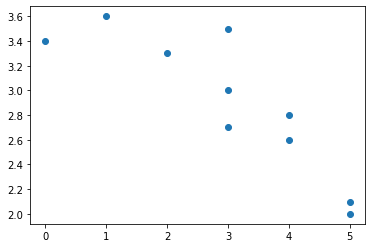

In [41]:
plt.scatter(tv_hours, GPA)

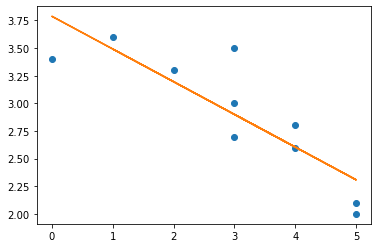

In [42]:
#Draw a fitting line

m,b = np.polyfit(tv_hours, GPA, 1)
plt.plot(tv_hours, GPA, 'o')
plt.plot(tv_hours, m*tv_hours + b);

# **Correlation**

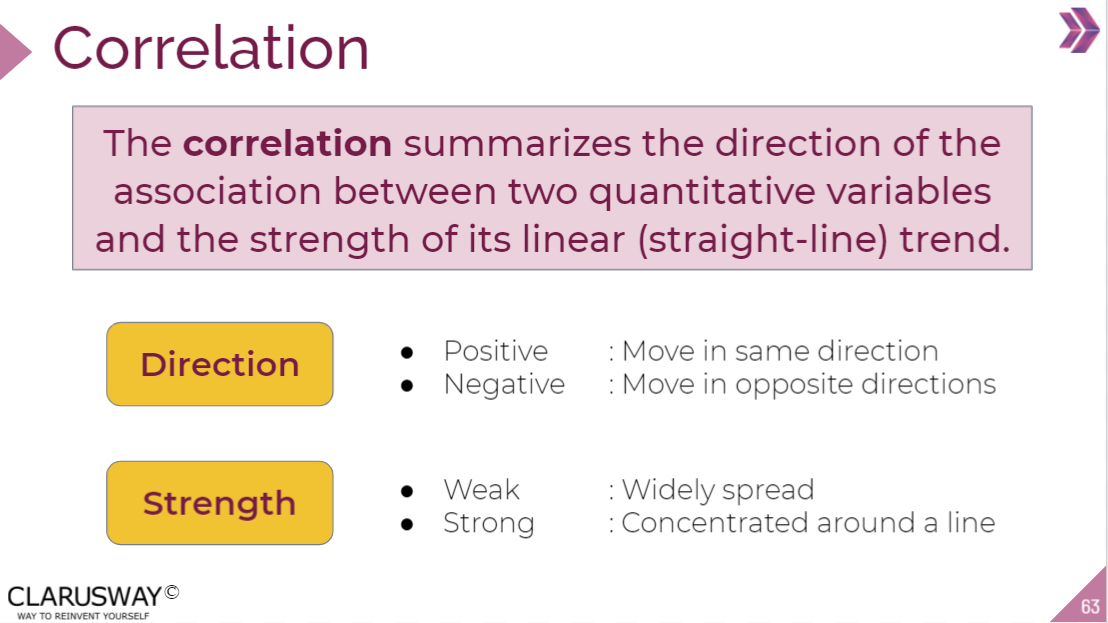

# Manuel (with Formula)

In [47]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

Convert the lists to Numpy arrays

In [48]:
x = np.array(tv_hours)
y = np.array(GPA)

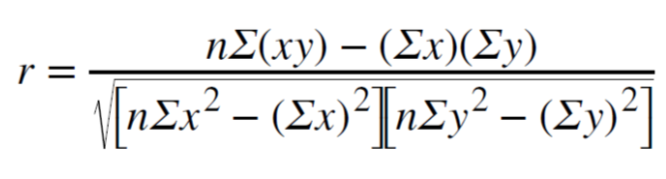

In [50]:
x = np.array(tv_hours)
y = np.array(GPA)

In [51]:
numer = len(x)*sum(x*y) - sum(x)*sum(y)
numer

-71.00000000000011

Use Pearson Correlation Formula. First calculate the numerator, second calculate the denominator, then calculate r coeff.

In [52]:
denom = np.sqrt((len(x)*sum(x**2)-sum(x)**2)*(len(y)*sum(y**2)-sum(y)**2))
denom

82.84926070883178

In [53]:
r = numer/denom
r

-0.8569780755138527

# Scipy

In [56]:
stats.pearsonr(x,y)

(-0.8569780755138502, 0.0015347436269997083)

In [54]:
r, p =stats.pearsonr(x,y)

In [55]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.8643457510060754, pvalue=0.0012537299375704556)

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

In [60]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.8643457510060754, pvalue=0.0012537299375704556)

Calculate Kendall’s tau, a correlation measure for ordinal data.

Kendall’s tau is a measure of the correspondence between two rankings.

In [59]:
stats.kendalltau(tv_hours, GPA)

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454747)

## Numpy

Calculate covariance with Numpy

In [52]:
np.cov(y,x)

array([[ 0.31777778, -0.78888889],
       [-0.78888889,  2.66666667]])

In [63]:
np.cov(x)

array(2.66666667)

Calculate the sample variances

In [61]:
stats.tvar(GPA)

0.3177777777777777

In [62]:
stats.tvar(tv_hours)

2.6666666666666665

Calculate the correlation coefficients with Numpy

In [64]:
np.corrcoef(x,y)

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])

# Pandas

Load "car_crashes" dataset from Seaborn

In [ ]:
carcrash = sns.load_dataset("car_crashes")
carcrash

In [65]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [66]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Describe the dataset

In [5]:
carcrash.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


Create the correlation matrix with Pandas

In [6]:
carcrash.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [12]:
carcrash["total"].corr(carcrash["no_previous"])

0.9561791745723078

In [13]:
carcrash.corr(method="spearman")

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.559365,0.894576,0.877605,0.958206,-0.118070,-0.000045
speeding,0.559365,1.000000,0.642654,0.562876,0.541699,-0.052128,-0.065341
alcohol,0.894576,0.642654,1.000000,0.796959,0.856012,-0.122899,0.020679
not_distracted,0.877605,0.562876,0.796959,1.000000,0.798136,-0.112853,0.015340
no_previous,0.958206,0.541699,0.856012,0.798136,1.000000,-0.036969,0.003937
ins_premium,-0.118070,-0.052128,-0.122899,-0.112853,-0.036969,1.000000,0.646697
ins_losses,-0.000045,-0.065341,0.020679,0.015340,0.003937,0.646697,1.000000


Spearman correlation matrix with Pandas

In [67]:

df.corr("spearman")

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736,-0.557080,-0.203367
pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032,0.099351,0.135896
age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051,0.257641,0.167293
sibsp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113,-0.307948,-0.828215
parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074,-0.397286,-0.683719
fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000,-0.308894,-0.531472
adult_male,-0.557080,0.099351,0.257641,-0.307948,-0.397286,-0.308894,1.000000,0.404744
alone,-0.203367,0.135896,0.167293,-0.828215,-0.683719,-0.531472,0.404744,1.000000


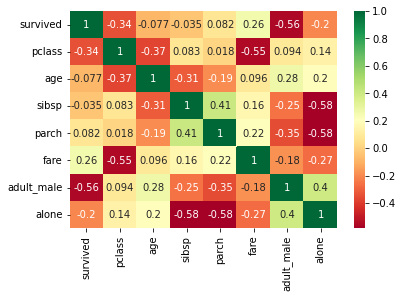

In [69]:

sns.heatmap(df.corr(),annot=True, cmap="RdYlGn");

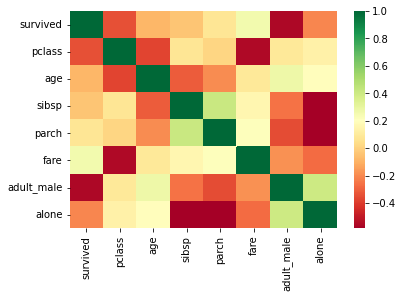

In [70]:
sns.heatmap(df.corr(), cmap= "RdYlGn");

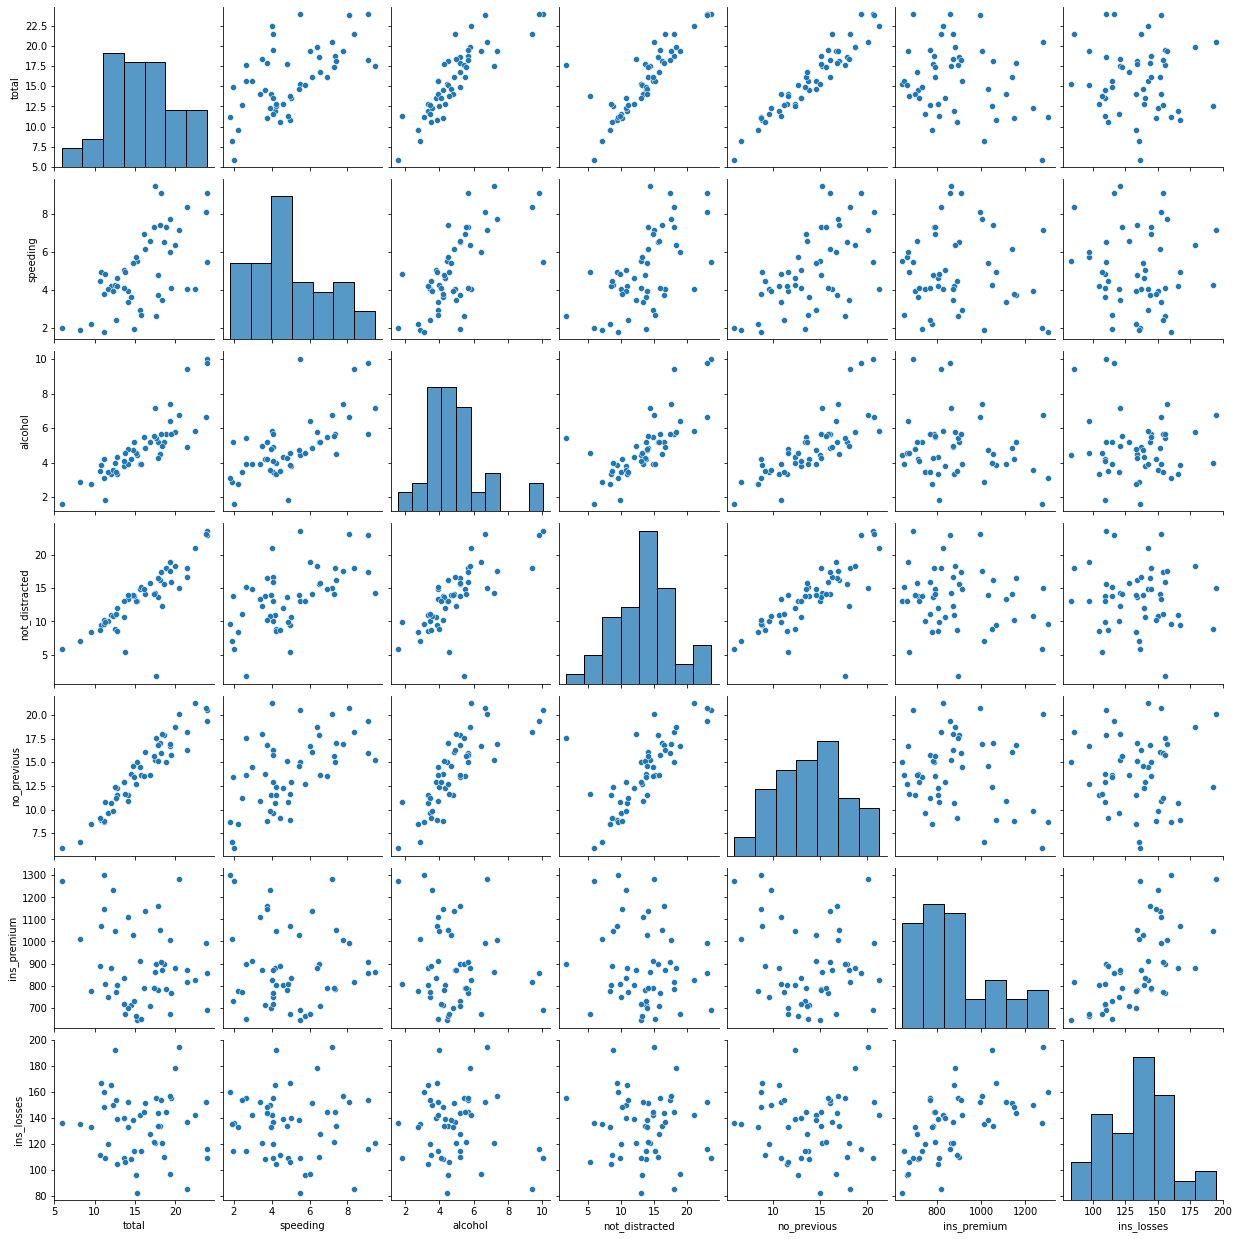

In [16]:
sns.pairplot(carcrash)